In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from data_import import import_ppd
from scipy.signal import savgol_filter
from scipy.stats import sem
from scipy.ndimage import uniform_filter1d

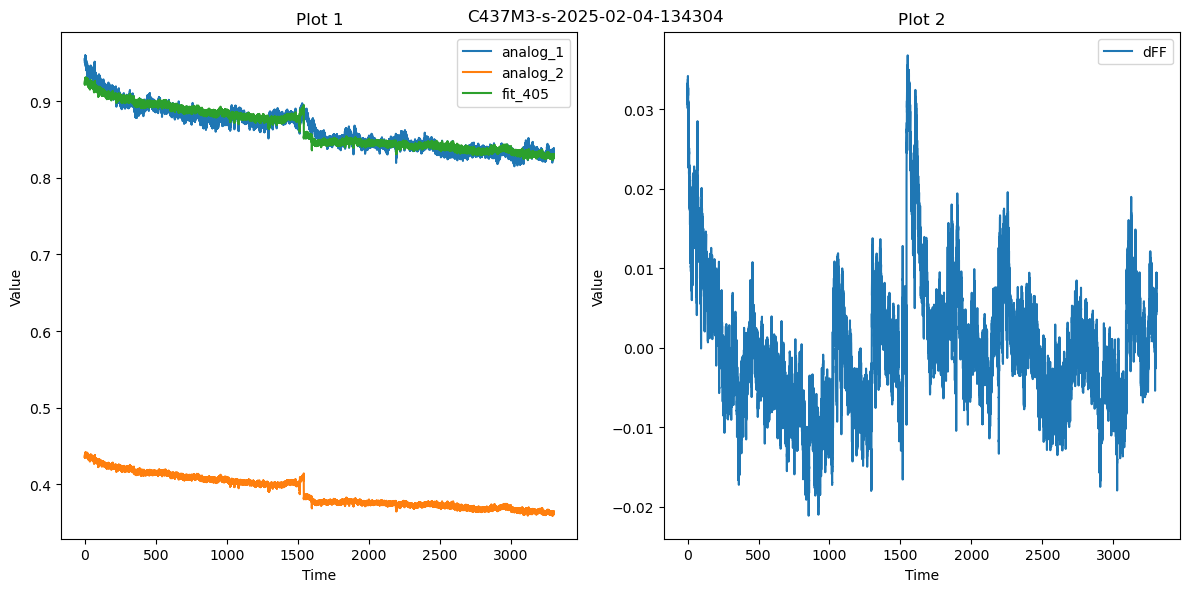

index: (array([  3370,   3439,   6324,   6395,   9301,   9374,  12371,  12504,
        15365,  15495,  18362,  18480,  22149,  22331,  25321,  25512,
        27940,  28137,  28138,  28139,  30567,  30689,  33408,  33515,
        36522,  36523,  36524,  36630,  39115,  39151,  39226,  39295,
        42424,  42481,  45307,  45308,  45309,  45357,  48285,  48367,
        51230,  51315,  54198,  54292,  57365,  57392,  60335,  60380,
        63295,  63345,  66467,  66740,  69254,  69484,  72132,  72405,
        75264,  75406,  78192,  78337,  81235,  81349,  84296,  84413,
        87262,  87387,  90609,  90717,  93164,  93246,  96054,  96132,
        99219,  99305, 102224, 102302, 105256, 105327, 108213, 108279,
       111238, 111322, 114261, 114389, 117274, 117399, 120209, 120408,
       123150, 123349, 125966, 126196, 129202, 129271, 132286, 132352,
       135240, 135305, 138058, 138111, 138300, 138341, 141206, 141249,
       144396, 144450, 147287, 147407, 150300, 150301, 150302, 150397

In [69]:
# Define the PPD file path

# ACh data salient sensory stimulation 

# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M1_s-2024-12-10-113010.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M2_s-2024-12-10-134149.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M3_s-2024-12-10-153245.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M4_s-2024-12-11-101212.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M1_s-2024-12-09-123214.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M2_s-2024-12-09-140601.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M3_s-2024-12-09-154339.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M1_s-2024-12-11-121507.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M3_s-2024-12-11-135108.ppd'

# LDB data files 

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C426M1_LDB-2024-12-18-111805.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C426M2_LDB-2024-12-18-115240.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C426M3_LDB-2024-12-18-135407.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C427M1_LDB-2024-12-18-102925.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C427M2_LDB-2024-12-18-110047.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C427M3_LDB-2024-12-18-113429.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C430M1_LDB-2024-12-18-133541.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C430M3_LDB-2024-12-18-141900.ppd'

# NA data salient sensory stimulation 

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C429M2-s-2025-01-31-153204.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C429M3-s-2025-02-02-140409.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C431M2-s-2025-01-31-135652.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C431M3-s-2025-02-02-155509.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C432M2-s-2025-01-31-084937.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C434M3-s-2025-01-30-104322.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C435M2-s-2025-02-03-100201.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C435M3-s-2025-02-03-113856.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C436M2-s-2025-01-31-102446.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C436M3-s-2025-01-31-122019.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C437M2-s-2025-02-03-133847.ppd'
ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C437M3-s-2025-02-04-134304.ppd'


# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

# Load the data from the CSV file
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

# Convert sample index to time vector
time = np.arange(len(data['analog_1'])) / 100                              

# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
fit_405=reg[0]*data['analog_2']+reg[1]
dFF=(data['analog_1']-fit_405)/fit_405 #this gives deltaF/F

#Function to apply smoothing to the data
def smooth_trace(trace, window_size):
    return uniform_filter1d(trace, size=window_size)
dFF = smooth_trace(dFF, 10)

data['fit_405']=fit_405
data['dFF']=dFF

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
ax1.plot(time, data['analog_1'], label='analog_1')
ax1.plot(time, data['analog_2'], label='analog_2')
ax1.plot(time, data['fit_405'], label='fit_405')

# Set plot 1 properties
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Plot 1')
ax1.legend()

# Plot 2
ax2.plot(time, data['dFF'], label='dFF')

# Set plot 2 properties
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('Plot 2')
ax2.legend()
# changing the plot range
# ax2.set_xlim([1200,1230])
# ax2.set_ylim([-0.02,0.03])

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure title
fig.suptitle(filename)

# Save the figure as PNG with 300 dpi
save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.pdf')
fig.savefig(save_path, format='pdf', dpi=300)

# Display the plots
plt.show()


# Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))

# Print the onsets and offsets
print("index:", index)

dFF = dFF[index[0][0]:]


In [70]:
# Load the Excel file

# ACh data salient sensory stimulation 

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M4_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M3_log.xlsx'

# NA data salient sensory stimulation 

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C429M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C429M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C431M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C431M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C432M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C434M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C435M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C435M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C436M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C436M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C437M2_s_log.xlsx'
file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C437M3_s_log.xlsx'


excel_data = pd.read_excel(file_path)

# Extract the stimulus (Stim) value from the 'Event' column
excel_data['Stim'] = excel_data['Event'].apply(lambda x: int(x.split(':')[0]))


# Subtract 'ledonset' from the 'Frame' column and convert to string

# ACh data salient sensory stimulation

# ledonset = 2002 # for mouse C426M1
# ledonset = 1150 # for mouse C426M2
# ledonset = 1362 # for mouse C426M3
# ledonset = 1294 # for mouse C426M4
# ledonset = 1275 # for mouse C427M1
# ledonset = 2029 # for mouse C427M2
# ledonset = 1162 # for mouse C427M3
# ledonset = 1278 # for mouse C430M1
# ledonset = 1275 # for mouse C430M3

# NA data salient sensory stimulation

# ledonset = 1717 # for mouse C429M2
# ledonset = 1309 # for mouse C429M3
# ledonset = 2525 # for mouse C431M2
# ledonset = 2153 # for mouse C431M3
# ledonset = 1192 # for mouse C432M2
# ledonset = 2054 # for mouse C434M3
# ledonset = 2041 # for mouse C435M2
# ledonset = 1065 # for mouse C435M3
# ledonset = 1459 # for mouse C436M2
# ledonset = 1426 # for mouse C436M3
# ledonset = 2152 # for mouse C437M2
ledonset = 1858 # for mouse C437M3


fps = 30
excel_data['Time'] = ((excel_data['Frame'] - ledonset) / fps).astype(str)

# Organize data into a dictionary
data = {
    'Mouse': {
        'Stim': excel_data['Stim'].tolist(),
        'Time': excel_data['Time'].tolist()
    }
}

# Use `data` as needed in your analysis

stim_data = data['Mouse']['Stim']
time_stamps = data['Mouse']['Time']
sampling_rate = 100
fps = 30

air_puff_indexes = [i for i, stim in enumerate(stim_data) if stim == 0]
light_indexes = [i for i, stim in enumerate(stim_data) if stim == 1]
mock_stim_indexes = [i for i, stim in enumerate(stim_data) if stim == 2]
hard_indexes = [i for i, stim in enumerate(stim_data) if stim == 3]
sound_indexes = [i for i, stim in enumerate(stim_data) if stim == 4]
choc_milk_indexes = [i for i, stim in enumerate(stim_data) if stim == 5]
# end_choc_milk_indexes = [i for i, stim in enumerate(stim_data) if stim == 6]

air_puff_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in air_puff_indexes]
light_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in light_indexes]
mock_stim_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in mock_stim_indexes]
hard_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in hard_indexes]
sound_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in sound_indexes]
choc_milk_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in choc_milk_indexes]
# end_choc_milk_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in end_choc_milk_indexes]


trace_duration = 5  # 5 seconds before and 30 seconds after each data index

# Convert trace duration from seconds to data points
trace_duration_points = trace_duration * sampling_rate

# Function to analyze and plot data for different index sets
def analyze_and_plot(indexes, dFF, sampling_rate, pre_start=5, post_start=10):
    trace_data_matrix = []

    for index in indexes:
        start = int(index - pre_start * sampling_rate)
        end = int(index + post_start * sampling_rate)
        trace_data = dFF[start:end]
        time = np.arange(start, end) / sampling_rate

        # Calculate the baseline value
        baseline_start = int(index - 5 * sampling_rate)
        baseline_end = int(index - 3 * sampling_rate)
        baseline = np.mean(dFF[baseline_start:baseline_end])

        # Compute the relative trace data
        relative_trace_data = trace_data - baseline

        # Append relative_trace_data to the matrix
        trace_data_matrix.append(relative_trace_data)


    return np.array(trace_data_matrix)

# Example usage for each data index set
trace_data_matrix_air_puff = analyze_and_plot(air_puff_data_indexes, dFF, sampling_rate)
trace_data_matrix_light = analyze_and_plot(light_data_indexes, dFF, sampling_rate)
trace_data_matrix_mock_stim = analyze_and_plot(mock_stim_data_indexes, dFF, sampling_rate)
trace_data_matrix_hard = analyze_and_plot(hard_data_indexes, dFF, sampling_rate)
trace_data_matrix_sound = analyze_and_plot(sound_data_indexes, dFF, sampling_rate)
trace_data_matrix_choc_milk = analyze_and_plot(choc_milk_data_indexes, dFF, sampling_rate)
# trace_data_matrix_end_choc_milk = analyze_and_plot(end_choc_milk_data_indexes, dFF, sampling_rate)


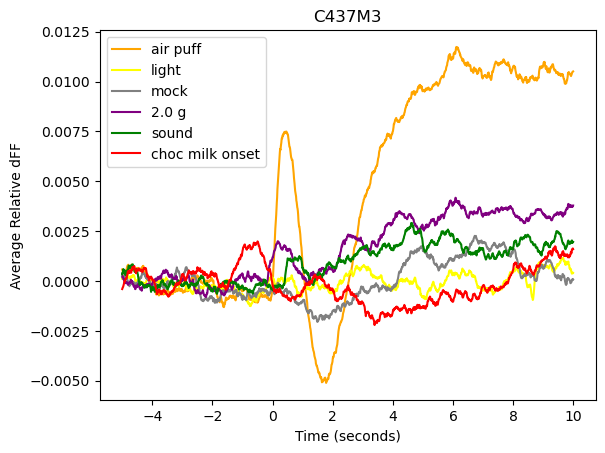

In [71]:
pre_start=5
post_start=10
# Calculate the average trace for water and TMT
average_trace_air_puff = np.mean(trace_data_matrix_air_puff, axis=0)
average_trace_light = np.mean(trace_data_matrix_light, axis=0)
average_trace_mock_stim = np.mean(trace_data_matrix_mock_stim, axis=0)
average_trace_hard = np.mean(trace_data_matrix_hard, axis=0)
average_trace_sound = np.mean(trace_data_matrix_sound, axis=0)
average_trace_choc_milk = np.mean(trace_data_matrix_choc_milk, axis=0)
# average_trace_end_choc_milk = np.mean(trace_data_matrix_end_choc_milk, axis=0)

plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_air_puff, label='air puff', color='orange')
plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_light, label='light', color='yellow')
plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_mock_stim, label='mock', color='gray')
plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_hard, label='2.0 g', color='purple')
plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_sound, label='sound', color='green')
plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_choc_milk, label='choc milk onset', color='red')
# plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_end_choc_milk, label='choc milk end', color='blue')

plt.xlabel('Time (seconds)')
plt.ylabel('Average Relative dFF')
plt.title('C437M3')
plt.legend()
save_path = os.path.join(os.path.dirname(file_path), filename + '.salient_stim_all' +  '.pdf')
plt.savefig(save_path, format='pdf', dpi=300)
plt.show()

In [17]:
"""
pre_start=5
post_start=10
# Calculate the average trace for water and TMT
# average_trace_pinp = np.mean(trace_data_matrix_pinp, axis=0)
average_trace_weak = np.mean(trace_data_matrix_weak, axis=0)
average_trace_mild = np.mean(trace_data_matrix_mild, axis=0)
average_trace_hard = np.mean(trace_data_matrix_hard, axis=0)


plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_weak, label='0.07 g', color='red')
plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_mild, label='0.4 g', color='green')
plt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_hard, label='2.0 g', color='purple')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Relative dFF')
plt.title('C430M1')
plt.legend()
plt.show()
"""

"\npre_start=5\npost_start=10\n# Calculate the average trace for water and TMT\n# average_trace_pinp = np.mean(trace_data_matrix_pinp, axis=0)\naverage_trace_weak = np.mean(trace_data_matrix_weak, axis=0)\naverage_trace_mild = np.mean(trace_data_matrix_mild, axis=0)\naverage_trace_hard = np.mean(trace_data_matrix_hard, axis=0)\n\n\nplt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_weak, label='0.07 g', color='red')\nplt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_mild, label='0.4 g', color='green')\nplt.plot(np.arange(-pre_start, post_start, 1/sampling_rate), average_trace_hard, label='2.0 g', color='purple')\nplt.xlabel('Time (seconds)')\nplt.ylabel('Average Relative dFF')\nplt.title('C430M1')\nplt.legend()\nplt.show()\n"

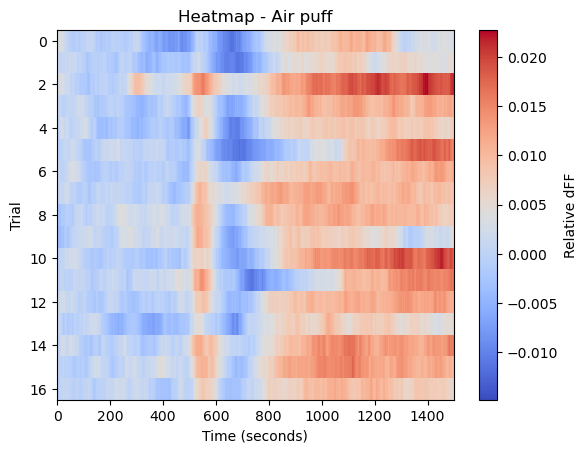

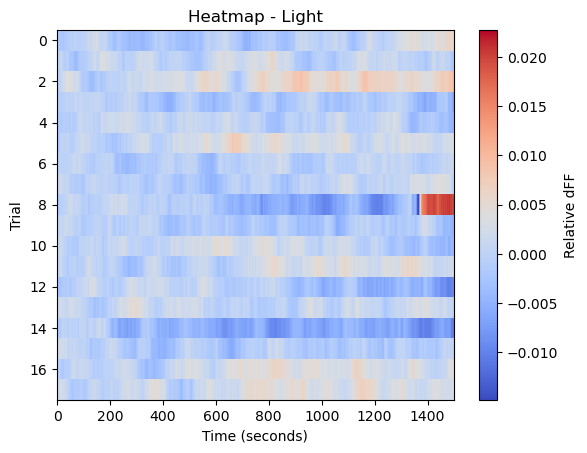

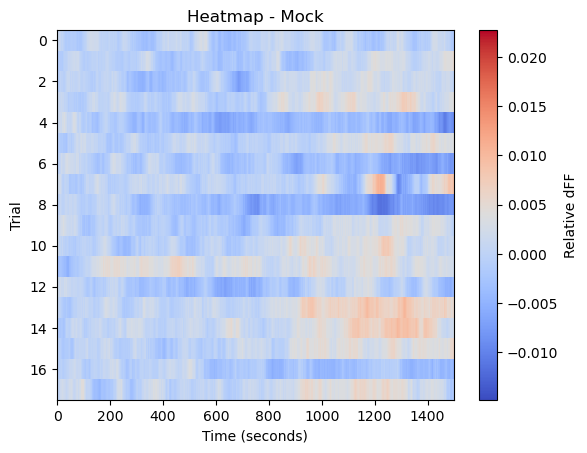

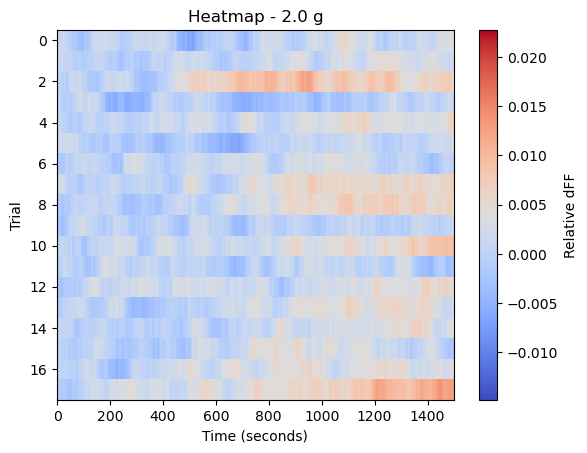

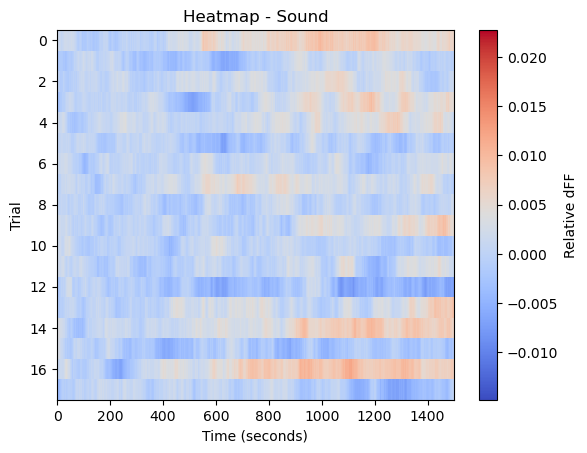

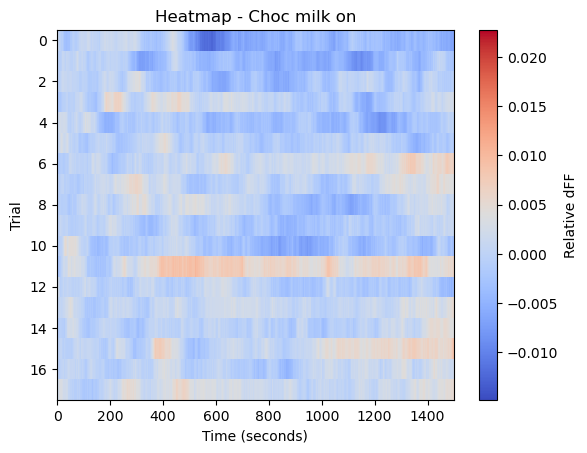

In [72]:
# could add adapted codes for the heatmaps

# Find global minimum and maximum values across all datasets for consistent color scaling
min_val = min(np.min(trace_data_matrix_air_puff), np.min(trace_data_matrix_light),
              np.min(trace_data_matrix_mock_stim), np.min(trace_data_matrix_hard),
              np.min(trace_data_matrix_sound), np.min(trace_data_matrix_choc_milk)) # need to add np.min(trace_data_matrix_end_choc_milk) 
max_val = max(np.max(trace_data_matrix_air_puff), np.max(trace_data_matrix_light),
              np.max(trace_data_matrix_mock_stim), np.max(trace_data_matrix_hard),
              np.max(trace_data_matrix_sound), np.max(trace_data_matrix_choc_milk)) # need to add np.max(trace_data_matrix_end_choc_milk) 

# Function to plot heatmap
def plot_heatmap(data_matrix, title, pre_start, post_start, sampling_rate, vmin, vmax):
    plt.imshow(data_matrix, aspect='auto', cmap='coolwarm',
               interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.colorbar(label='Relative dFF')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Trial')
    plt.title(title)
    save_path = os.path.join(os.path.dirname(file_path), filename + title +  '.pdf')
    plt.savefig(save_path, format='pdf', dpi=300)
    plt.show()
    
# Plotting heatmaps with consistent color scaling

plot_heatmap(trace_data_matrix_air_puff, 'Heatmap - Air puff', pre_start, post_start, sampling_rate, min_val, max_val)
plot_heatmap(trace_data_matrix_light, 'Heatmap - Light', pre_start, post_start, sampling_rate, min_val, max_val)
plot_heatmap(trace_data_matrix_mock_stim, 'Heatmap - Mock', pre_start, post_start, sampling_rate, min_val, max_val)
plot_heatmap(trace_data_matrix_hard, 'Heatmap - 2.0 g', pre_start, post_start, sampling_rate, min_val, max_val)
plot_heatmap(trace_data_matrix_sound, 'Heatmap - Sound', pre_start, post_start, sampling_rate, min_val, max_val)
plot_heatmap(trace_data_matrix_choc_milk, 'Heatmap - Choc milk on', pre_start, post_start, sampling_rate, min_val, max_val)
# plot_heatmap(trace_data_matrix_end_choc_milk, 'Heatmap - Choc milk off', pre_start, post_start, sampling_rate, min_val, max_val)


In [73]:
traces = {
    'average_trace_air_puff': average_trace_air_puff ,
    'average_trace_light': average_trace_light,
    'average_trace_mock_stim': average_trace_mock_stim,
    'average_trace_hard': average_trace_hard,
    'average_trace_sound': average_trace_sound,
    'average_trace_choc_milk': average_trace_choc_milk
    # 'average_trace_end_choc_milk': average_trace_end_choc_milk,
}

# Define the file path and name
save_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\\' + filename + '.npy'
# save_file_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\SNI\\' + filename + '.npy'

# Save the dictionary to a NumPy file
np.save(save_file_path, traces)

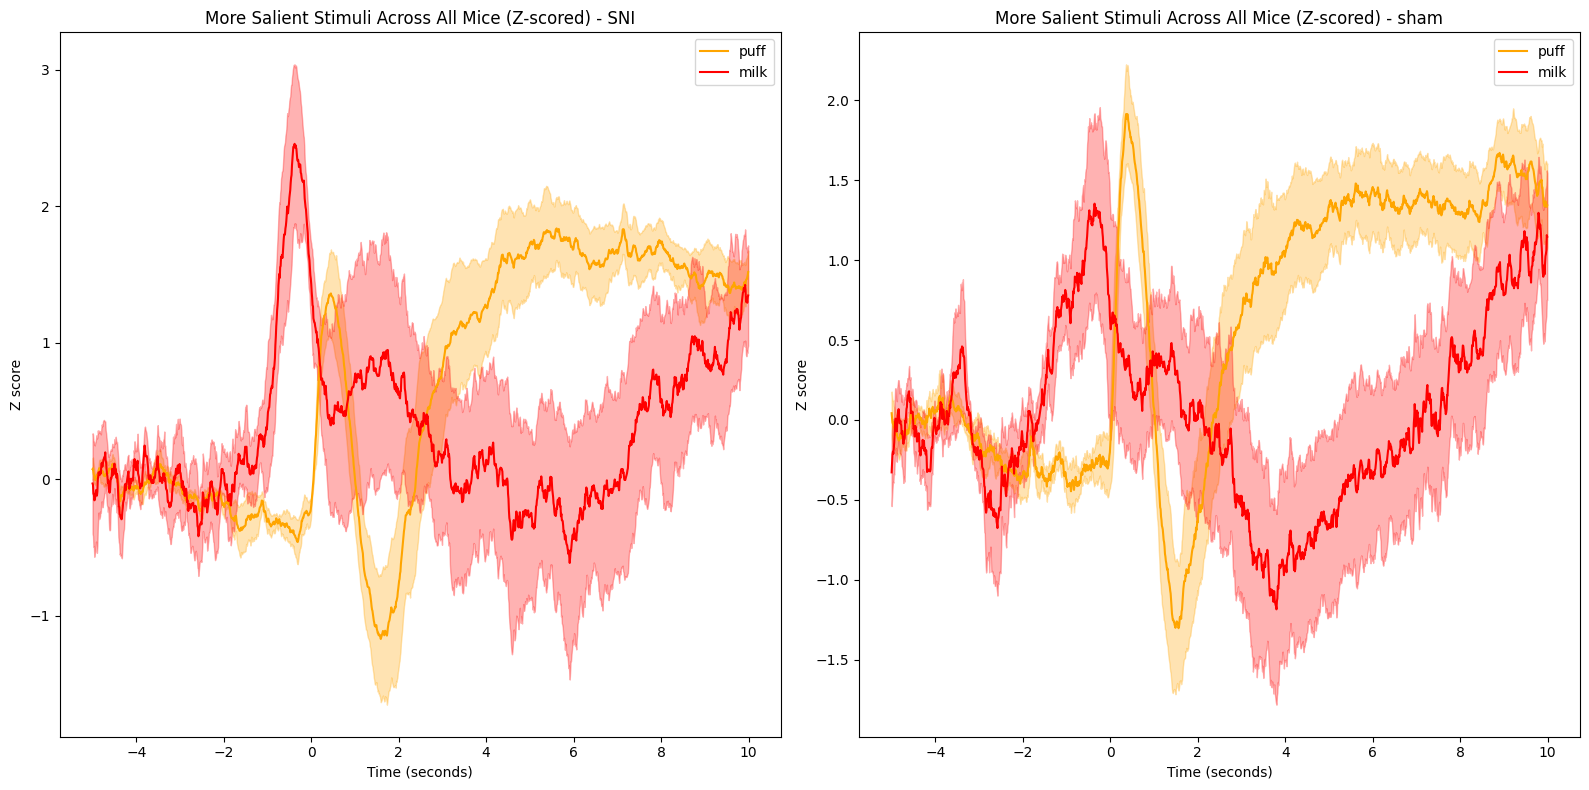

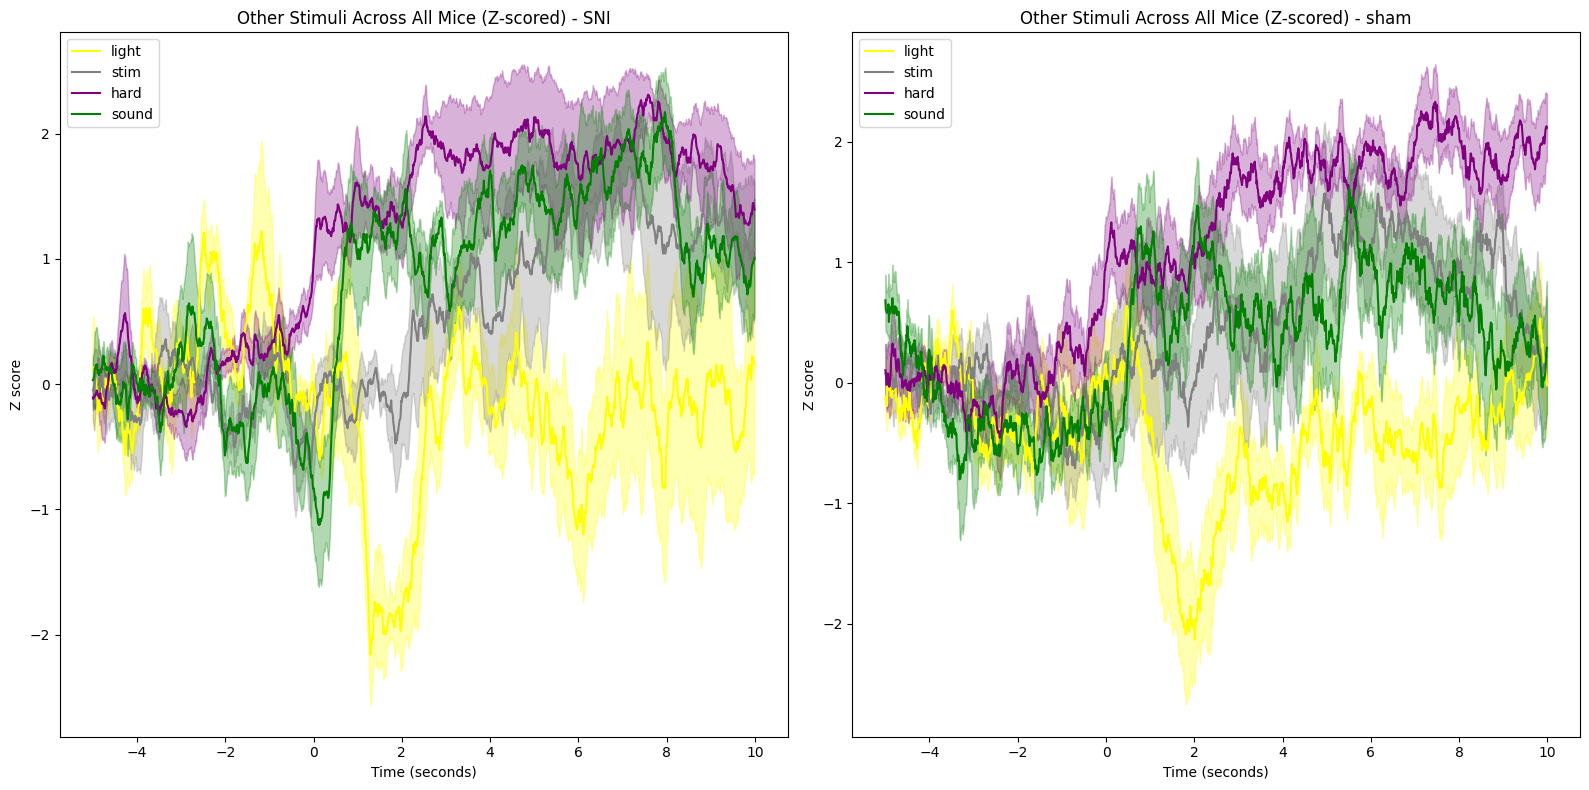

In [2]:
# plotting Z-scored data for SNI and sham

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

sampling_rate=100

# Function to calculate average and SEM across all animals for each trial type
def calculate_avg_sem_across_animals(data_per_animal, trial_types):
    avg_sem = {}
    for trial in trial_types:
        trial_data = np.array([animal_data[trial] for animal_data in data_per_animal.values() if trial in animal_data])
        avg, sem_val = np.mean(trial_data, axis=0), sem(trial_data, axis=0)
        avg_sem[trial] = (avg, sem_val)
    return avg_sem

# Path to the uploaded zip files for sni and sni-ctrl conditions

# extract_folder_path_sni = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\SNI\\'
# extract_folder_path_sham = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\sham\\'

extract_folder_path_sni = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\SNI\\'
extract_folder_path_sham = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\sham\\'



# Loading the data from .npy files for both conditions
all_data_sni = {animal: np.load(os.path.join(extract_folder_path_sni, animal), allow_pickle=True) 
                for animal in os.listdir(extract_folder_path_sni) if animal.endswith('.npy')}
all_data_sham = {animal: np.load(os.path.join(extract_folder_path_sham, animal), allow_pickle=True) 
                     for animal in os.listdir(extract_folder_path_sham) if animal.endswith('.npy')}

# Defining trial types
more_salient_trials = ['average_trace_air_puff', 'average_trace_choc_milk'] # add 'average_trace_end_choc_milk'
other_trials = ['average_trace_light', 'average_trace_mock_stim', 'average_trace_hard', 'average_trace_sound']

# Function to apply z-score normalization and zero out a specific period
def zscore_and_zero_period(data, baseline_start, baseline_end, zero_start, zero_end, sampling_rate):
    # Applying z-score normalization with baseline
    baseline_indices = (np.arange(baseline_start, baseline_end, 1/sampling_rate) * sampling_rate).astype(int)
    baseline_mean = np.mean(data[baseline_indices])
    baseline_std = np.std(data[baseline_indices])
    normalized_data = (data - baseline_mean) / baseline_std

    # Zeroing out the specific period
    zero_indices = (np.arange(zero_start, zero_end, 1/sampling_rate) * sampling_rate).astype(int)
    zero_mean = np.mean(normalized_data[zero_indices])
    return normalized_data - zero_mean

# Function to extract, normalize, and zero out trials for each animal
def extract_normalize_zero_trials_per_animal(animal_data, trial_types, baseline_start, baseline_end, zero_start, zero_end, sampling_rate):
    trials = {}
    for animal, data in animal_data.items():
        animal_trials = {}
        for trial in trial_types:
            if isinstance(data.item(), dict) and trial in data.item():
                processed_data = zscore_and_zero_period(data.item()[trial], baseline_start, baseline_end, zero_start, zero_end, sampling_rate)
                animal_trials[trial] = processed_data
        trials[animal] = animal_trials
    return trials

# Extracting, normalizing, and zeroing out trials separately for each condition
baseline_start_sec = 0  # Starting point of the baseline in seconds
baseline_end_sec = 15   # Ending point of the baseline in seconds
zero_start_sec = 0     # Starting point of zeroing out period in seconds
zero_end_sec = 2       # Ending point of zeroing out period in seconds

# Process sni and sni-ctrl data separately for z-scoring
sni_data_processed = extract_normalize_zero_trials_per_animal(all_data_sni, 
                                                              more_salient_trials + other_trials, 
                                                              baseline_start_sec, baseline_end_sec, 
                                                              zero_start_sec, zero_end_sec, sampling_rate)

sham_data_processed = extract_normalize_zero_trials_per_animal(all_data_sham, 
                                                                   more_salient_trials + other_trials, 
                                                                   baseline_start_sec, baseline_end_sec, 
                                                                   zero_start_sec, zero_end_sec, sampling_rate)


# Calculating average and SEM for mechanical and thermal trials with processed data for both conditions
more_salient_avg_sem_sni = calculate_avg_sem_across_animals(sni_data_processed, more_salient_trials)
other_avg_sem_sni = calculate_avg_sem_across_animals(sni_data_processed, other_trials)
more_salient_avg_sem_sham = calculate_avg_sem_across_animals(sham_data_processed, more_salient_trials)
other_avg_sem_sham = calculate_avg_sem_across_animals(sham_data_processed, other_trials)

# extract_folder_path =r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\\'  # Change this to your desired extraction path

extract_folder_path =r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\\' 


# Modified plotting function to display subplots for SNI and SNI-CTRL
def plot_trials_with_colors_zscore_subplot(trial_data_sni, trial_data_sham, title, sampling_rate, color_codes):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    time_axis = np.arange(-5, 10, 1/sampling_rate)

    for trial, (avg, error) in trial_data_sni.items():
        color = color_codes.get(trial, 'black')
        axes[0].plot(time_axis, avg, label=trial.split('_')[-1], color=color)
        axes[0].fill_between(time_axis, avg - error, avg + error, color=color, alpha=0.3)
    axes[0].set_title(f"{title} - SNI")
    axes[0].set_xlabel('Time (seconds)')
    axes[0].set_ylabel('Z score')
    axes[0].legend()
    

    for trial, (avg, error) in trial_data_sham.items():
        color = color_codes.get(trial, 'black')
        axes[1].plot(time_axis, avg, label=trial.split('_')[-1], color=color)
        axes[1].fill_between(time_axis, avg - error, avg + error, color=color, alpha=0.3)
    axes[1].set_title(f"{title} - sham")
    axes[1].set_xlabel('Time (seconds)')
    axes[1].set_ylabel('Z score')
    axes[1].legend()

    plt.tight_layout()
    # saving the figure
    
    save_path = os.path.join(os.path.dirname(extract_folder_path), title + '.2.pdf')
    plt.savefig(save_path, format='pdf', dpi=300)
    
    plt.show()

# Define custom color codes
color_codes = {
    'average_trace_air_puff': 'orange',
    'average_trace_light': 'yellow',
    'average_trace_mock_stim': 'grey',
    'average_trace_hard': 'purple',
    'average_trace_sound': 'green',
    'average_trace_choc_milk': 'red',
    # 'average_trace_end_choc_milk': 'blue'
}
    

# Plotting the trials with processed data in subplots
plot_trials_with_colors_zscore_subplot(more_salient_avg_sem_sni, more_salient_avg_sem_sham, 
                                       "More Salient Stimuli Across All Mice (Z-scored)", sampling_rate, color_codes)
plot_trials_with_colors_zscore_subplot(other_avg_sem_sni, other_avg_sem_sham, "Other Stimuli Across All Mice (Z-scored)", sampling_rate, color_codes)



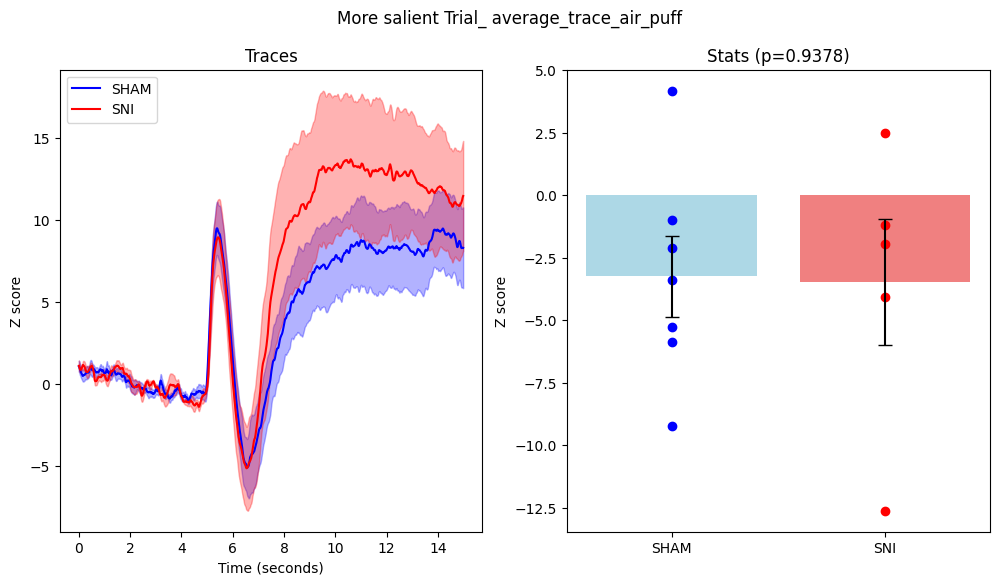

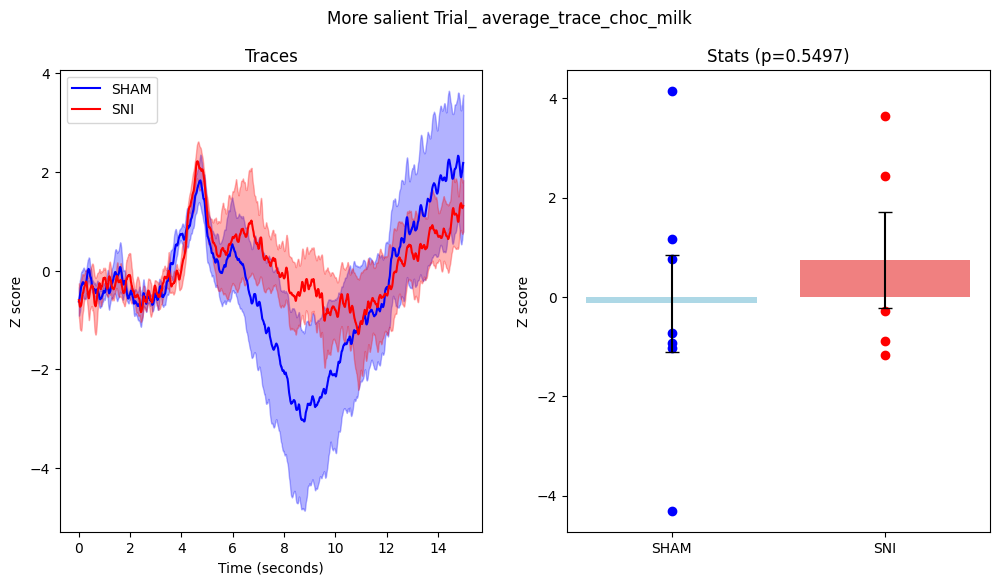

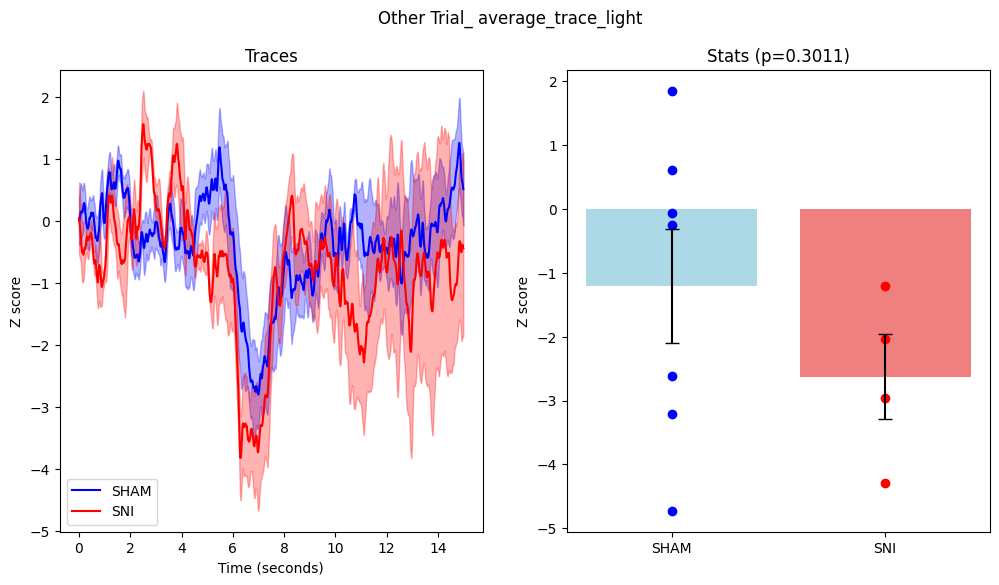

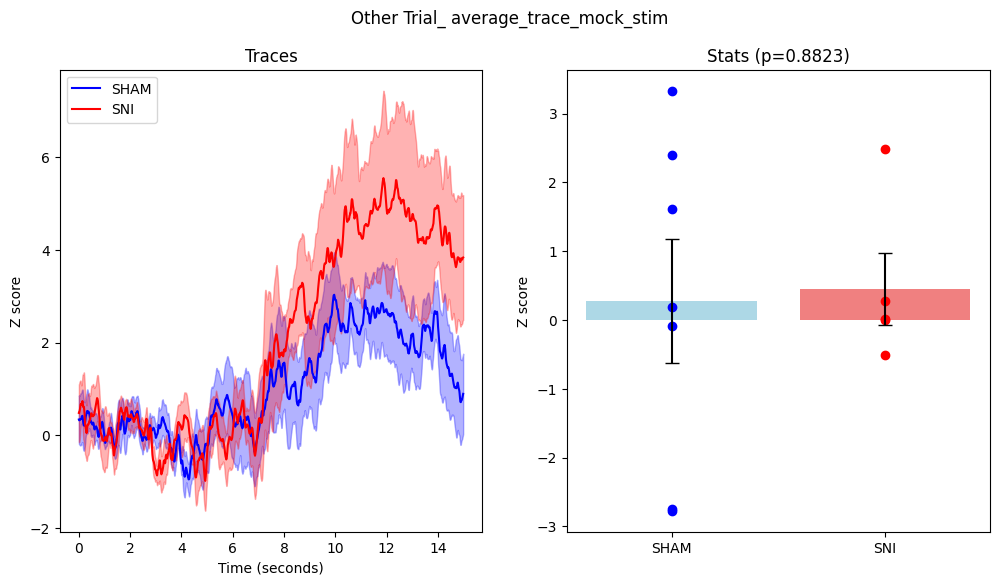

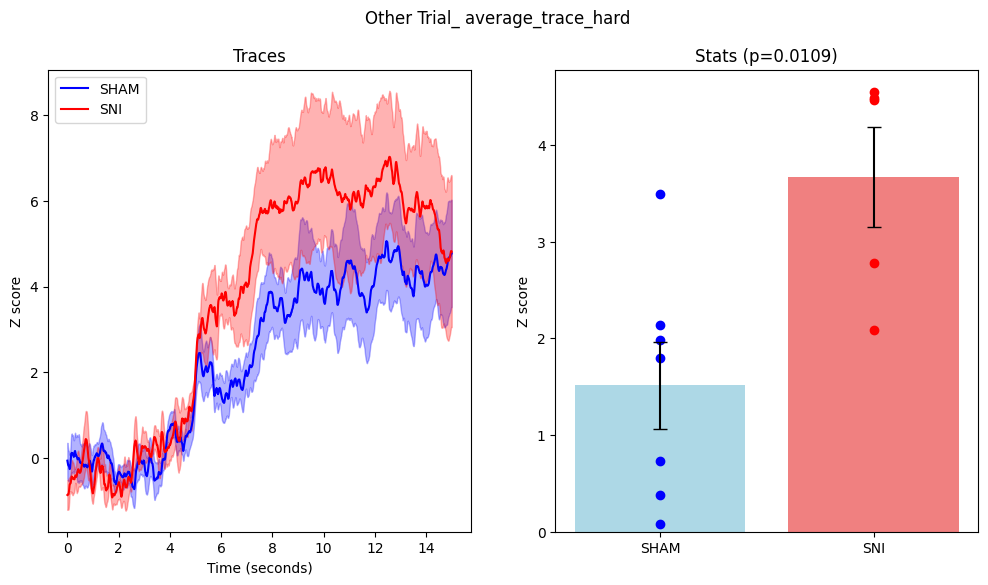

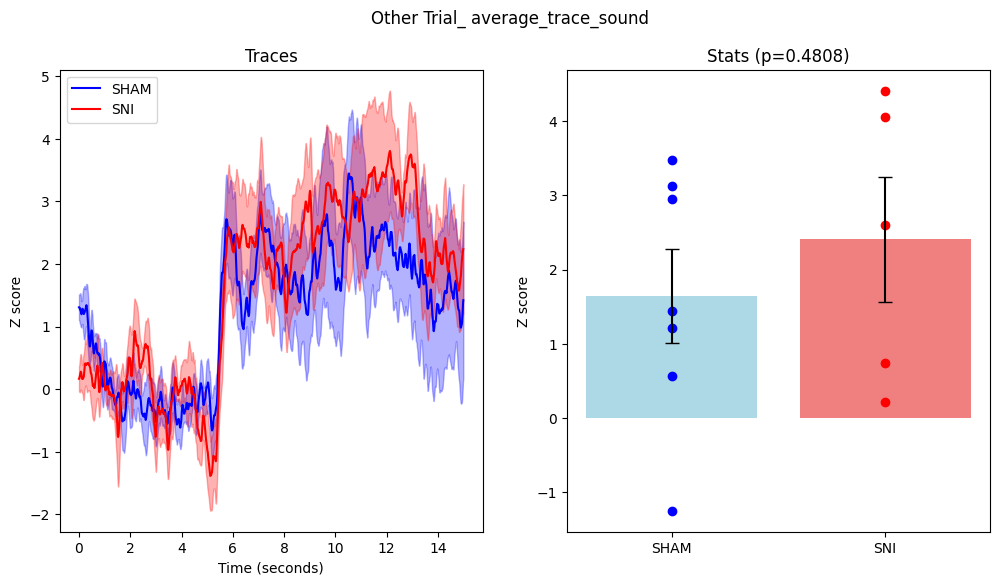

In [3]:
# comparison between SNI and sham and statistical analysis, SNI and sham

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, ttest_ind
from scipy.ndimage import uniform_filter1d

# Paths to the data directories
# sni_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\SNI\\'
# sham_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\sham\\'

# same Ach salient stimuli data but z scored
# sni_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\SNI\SNI_zscored\\'
# sham_path = r'H:\Magdalena\photometry\fp_recordings\ACh_sensory\salient\sham\sham_zscored\\'

# NA salient stimulation Z scored
sni_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\zscored\SNI\\'
sham_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\zscored\sham\\'



# Function to load the data
def load_data(path):
    return {animal: np.load(os.path.join(path, animal), allow_pickle=True) 
            for animal in os.listdir(path) if animal.endswith('.npy')}

# Load SHAM and SNI data
sham_data = load_data(sham_path)
sni_data = load_data(sni_path)

# Define trial types
more_salient_trials = ['average_trace_air_puff', 'average_trace_choc_milk'] # add 'average_trace_end_choc_milk'
other_trials = ['average_trace_light', 'average_trace_mock_stim', 'average_trace_hard', 'average_trace_sound']

# Function to extract trials for each animal
def extract_trials_per_animal(animal_data, trial_types):
    trials = {}
    for animal, data in animal_data.items():
        animal_trials = {}
        for trial in trial_types:
            if isinstance(data.item(), dict) and trial in data.item():
                animal_trials[trial] = data.item()[trial]
        trials[animal] = animal_trials
    return trials

# Function to apply smoothing to the data
def smooth_trace(trace, window_size=1):
    return uniform_filter1d(trace, size=window_size)

# Extracting and smoothing trials for each condition
def extract_and_smooth_trials(animal_data, trial_types, window_size=5):
    trials = {}
    for animal, data in animal_data.items():
        animal_trials = {}
        for trial in trial_types:
            if isinstance(data.item(), dict) and trial in data.item():
                smoothed_trace = smooth_trace(data.item()[trial], window_size)
                animal_trials[trial] = smoothed_trace
        trials[animal] = animal_trials
    return trials

sham_more_salient_data = extract_and_smooth_trials(sham_data, more_salient_trials)
sni_more_salient_data = extract_and_smooth_trials(sni_data, more_salient_trials)

sham_other_data = extract_and_smooth_trials(sham_data, other_trials)
sni_other_data = extract_and_smooth_trials(sni_data, other_trials)

# Function to calculate average and SEM across all animals for each trial type
def calculate_avg_sem_across_animals(data_per_animal, trial_types):
    avg_sem = {}
    for trial in trial_types:
        trial_data = np.array([animal_data[trial] for animal_data in data_per_animal.values() if trial in animal_data])
        avg, sem_val = np.mean(trial_data, axis=0), sem(trial_data, axis=0)
        avg_sem[trial] = (avg, sem_val)
    return avg_sem

# Calculate average and SEM for each condition
sham_more_salient_avg_sem = calculate_avg_sem_across_animals(sham_more_salient_data, more_salient_trials)
sni_more_salient_avg_sem = calculate_avg_sem_across_animals(sni_more_salient_data, more_salient_trials)

sham_other_avg_sem = calculate_avg_sem_across_animals(sham_other_data, other_trials)
sni_other_avg_sem = calculate_avg_sem_across_animals(sni_other_data, other_trials)

# Function to calculate mean in the specified index range and perform statistical tests
def compare_conditions(sham_data, sni_data, trial_types, sampling_rate, start_time, end_time):
    stats_results = {}
    start_index = int(start_time * sampling_rate)
    end_index = int(end_time * sampling_rate)
    
    for trial in trial_types:
        sham_means = [np.mean(data[trial][start_index:end_index]) for data in sham_data.values() if trial in data]
        sni_means = [np.mean(data[trial][start_index:end_index]) for data in sni_data.values() if trial in data]
        
        # Perform t-test
        t_stat, p_value = ttest_ind(sham_means, sni_means)
        stats_results[trial] = (sham_means, sni_means, t_stat, p_value)
    
    return stats_results

# Compare SHAM and SNI for mechanical and thermal trials
more_salient_stats = compare_conditions(sham_more_salient_data, sni_more_salient_data, more_salient_trials, sampling_rate, 6, 7)  
other_stats = compare_conditions(sham_other_data, sni_other_data, other_trials, sampling_rate, 6, 6.5)

# Updated color codes
color_sham = 'blue'
color_sni = 'red'
light_color_sham = '#add8e6'  # Light blue
light_color_sni = '#f08080'   # Light red

# Plotting function
def plot_comparison(sham_data, sni_data, stats, trial_type, title, sampling_rate):
    time_axis = np.arange(len(sham_data[trial_type][0])) / sampling_rate
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot SHAM and SNI traces
    sham_avg, sham_sem = sham_data[trial_type]
    sni_avg, sni_sem = sni_data[trial_type]
    
    axs[0].plot(time_axis, sham_avg, label='SHAM', color=color_sham)
    axs[0].fill_between(time_axis, sham_avg - sham_sem, sham_avg + sham_sem, color=color_sham, alpha=0.3)
    
    axs[0].plot(time_axis, sni_avg, label='SNI', color=color_sni)
    axs[0].fill_between(time_axis, sni_avg - sni_sem, sni_avg + sni_sem, color=color_sni, alpha=0.3)
    
    axs[0].set_title('Traces')
    axs[0].set_xlabel('Time (seconds)')
    # axs[0].set_ylabel('ΔF/F₀')
    axs[0].set_ylabel('Z score')
    axs[0].legend()

    # Plot stats (mean +/- SEM and individual points)
    sham_means, sni_means, t_stat, p_value = stats[trial_type]
    
    # Plot bars first
    axs[1].bar(['SHAM', 'SNI'], [np.mean(sham_means), np.mean(sni_means)], 
               yerr=[sem(sham_means), sem(sni_means)], capsize=5, color=[light_color_sham, light_color_sni])
    
    # Plot individual data points on top of bars
    axs[1].scatter(['SHAM']*len(sham_means), sham_means, color=color_sham)
    axs[1].scatter(['SNI']*len(sni_means), sni_means, color=color_sni)
    
    axs[1].set_title(f'Stats (p={p_value:.4f})')
    # axs[1].set_ylabel('Mean ΔF/F₀')
    axs[1].set_ylabel('Z score')
    
    plt.suptitle(title)
    # saving the figure
    
    save_path = os.path.join(os.path.dirname(extract_folder_path), title + '.pdf')
    plt.savefig(save_path, format='pdf', dpi=300)

    plt.show()

# Plotting mechanical trials
for trial in more_salient_trials:
    plot_comparison(sham_more_salient_avg_sem, sni_more_salient_avg_sem, more_salient_stats, trial, f"More salient Trial_ {trial}", sampling_rate)

# Plotting thermal trials
for trial in other_trials:
    plot_comparison(sham_other_avg_sem, sni_other_avg_sem, other_stats, trial, f"Other Trial_ {trial}", sampling_rate)
